### Rossmann Store Sales

#### Problem Description (Forecast sales using store, promotion, and competitor data)


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

#### Attributes Information

1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
8. StoreType - differentiates between 4 different store models: a, b, c, d
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
10. CompetitionDistance - distance in meters to the nearest competitor store
11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
12. Promo - indicates whether a store is running a promo on that day
13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## _Exploratory Data Analysis_



Setting the work directory

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("//content//drive//My Drive//Career Services Hackathon")

### _Import Libraries_

In [0]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Reading & Understanding the data

In [0]:
stores_data = pd.read_csv("store.csv", sep=',', header=0, na_values=["?",",","#","unknown"])
train_data = pd.read_csv("train.csv", sep=',', header=0, na_values=["?",",","#","unknown"])
test_data = pd.read_csv("test.csv", sep=',', header=0, na_values=["?",",","#","unknown"])

In [0]:
Test_data = pd.read_csv("test.csv", sep=',', header=0, na_values=["?",",","#","unknown"])

In [7]:
train_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1


In [8]:
train_data.shape

(1017209, 9)

In [9]:
test_data.shape

(41088, 8)

In [10]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [11]:
train_data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,27-12-2013,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


Checking for missing values

In [12]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### Feature Engineering

Creating Year & Month Columns from the date column

First Changing the Date column into Year/Month/Date format

In [0]:
train_data["Date"] = train_data["Date"].astype("Datetime64")

In [0]:
test_data["Date"] = test_data["Date"].astype("Datetime64")

In [0]:
train_data['Year'] = pd.DatetimeIndex(train_data['Date']).year

In [0]:
test_data['Year'] = pd.DatetimeIndex(test_data['Date']).year

In [0]:
train_data['Month'] = pd.DatetimeIndex(train_data['Date']).month

In [0]:
test_data['Month'] = pd.DatetimeIndex(test_data['Date']).month

Reindexing the Columns


In [0]:
train_data = train_data.reindex(columns=['Store','DayOfWeek','Date','Year','Month','Customers','Open','Promo','StateHoliday','SchoolHoliday','Sales'])

Checking the Unique values of each column

In [21]:
train_data.nunique()

Store             1115
DayOfWeek            7
Date               942
Year                 3
Month               12
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
Sales            21734
dtype: int64

In [22]:
train_data.head(3)

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263
1,2,5,2015-07-31,2015,7,625,1,1,0,1,6064
2,3,5,2015-07-31,2015,7,821,1,1,0,1,8314


In [23]:
train_data.tail(3)

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
1017206,1113,2,2013-01-01,2013,1,0,0,0,a,1,0
1017207,1114,2,2013-01-01,2013,1,0,0,0,a,1,0
1017208,1115,2,2013-01-01,2013,1,0,0,0,a,1,0


Checking the level counts of Open, Promo & State Holiday columns

In [24]:
train_data['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [25]:
train_data['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [26]:
train_data['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Converting the zero values from int to categorical in State Holiday column

In [0]:
train_data.loc[train_data['StateHoliday']==0,'StateHoliday']='0'

In [0]:
test_data.loc[test_data['StateHoliday']==0,'StateHoliday']='0'

In [29]:
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [30]:
train_data['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

Stores Data

In [31]:
stores_data.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [32]:
stores_data.tail(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [33]:
stores_data.shape

(1115, 10)

Imputing 0 values in place of NaN in Promo2SinceWeek,Promo2SinceYear,PromoInterval since those stores did not particiapte in Promo2 

In [0]:
stores_data.loc[stores_data['Promo2']==0,'Promo2SinceWeek']=0

In [0]:
stores_data.loc[stores_data['Promo2']==0,'Promo2SinceYear']=0

In [0]:
stores_data.loc[stores_data['Promo2']==0,'PromoInterval']=0

In [38]:
stores_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Converting the data types

In [0]:
columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','StoreType','Assortment','Promo2','PromoInterval']
for col in columns:
    stores_data[col]=stores_data[col].astype('category')

In [40]:
stores_data.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.0,761.0,1115.0,1115.0,1115.0,1115.0
unique,NaN,4,3,NaN,12.0,23.0,2.0,25.0,8.0,4.0
top,NaN,a,a,NaN,9.0,2013.0,1.0,0.0,0.0,0.0
freq,NaN,602,593,NaN,125.0,83.0,571.0,544.0,544.0,544.0
mean,558.00000,NaN,NaN,5404.901079,NaN,NaN,NaN,NaN,NaN,NaN
std,322.01708,NaN,NaN,7663.174720,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,279.50000,NaN,NaN,717.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,558.00000,NaN,NaN,2325.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,836.50000,NaN,NaN,6882.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
stores_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

Dropping the CompetitionOpenSinceMonth & CompetitionOpenSinceYear columns since there is huge missing percentage 

In [0]:
stores_data_1 = stores_data.drop(columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

In [43]:
stores_data_1.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
Promo2SinceWeek        0
Promo2SinceYear        0
PromoInterval          0
dtype: int64

Imputing the missing values in Competition Distance column with the mean value

In [0]:
stores_data_1['CompetitionDistance'].fillna(stores_data_1['CompetitionDistance'].mean(), inplace=True)

In [45]:
stores_data_1.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Promo2SinceWeek        0
Promo2SinceYear        0
PromoInterval          0
dtype: int64

Merging the train & store data frames

In [0]:
train_merge = pd.merge(train_data, stores_data_1, on = 'Store')

Merging the test & store data frames

In [0]:
test_merge = pd.merge(test_data, stores_data_1, on = 'Store')

In [48]:
train_merge.shape

(1017209, 18)

In [49]:
test_merge.shape

(41088, 17)

In [50]:
train_merge.head(3)

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263,c,a,1270.0,0,0.0,0.0,0
1,1,4,2015-07-30,2015,7,546,1,1,0,1,5020,c,a,1270.0,0,0.0,0.0,0
2,1,3,2015-07-29,2015,7,523,1,1,0,1,4782,c,a,1270.0,0,0.0,0.0,0


In [51]:
train_merge.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Year                   0
Month                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Sales                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Promo2SinceWeek        0
Promo2SinceYear        0
PromoInterval          0
dtype: int64

In [52]:
test_merge.isnull().sum()

Id                      0
Store                   0
DayOfWeek               0
Date                    0
Open                   11
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
StoreType               0
Assortment              0
CompetitionDistance     0
Promo2                  0
Promo2SinceWeek         0
Promo2SinceYear         0
PromoInterval           0
dtype: int64

In [53]:
train_merge.dtypes

Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Year                            int64
Month                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
Sales                           int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
Promo2                       category
Promo2SinceWeek              category
Promo2SinceYear              category
PromoInterval                category
dtype: object

DATA VISUALIZATION

Checking the distribution of Target column

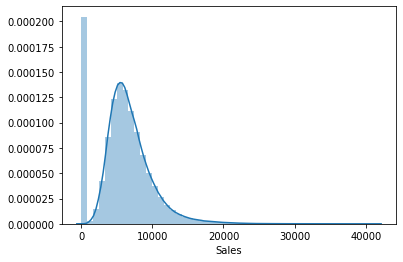

In [54]:
sns.distplot(train_merge['Sales'])

Finding the corelations among the numerical features in the data

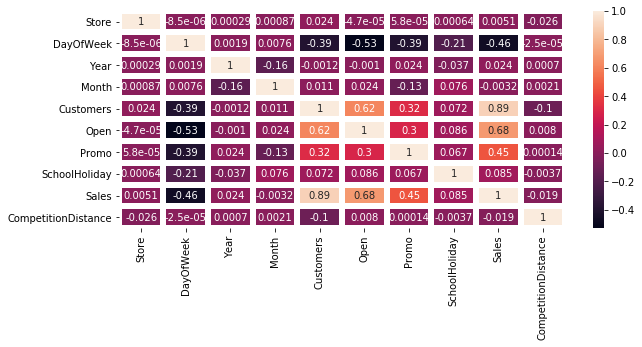

In [55]:
plt.figure( figsize=(10,4))
corr = train_merge.corr()
ax = sns.heatmap(corr,annot =True, linewidth = 5, cbar = True)  

Counting the number of stores with respect to Day of Week & Open columns in the data

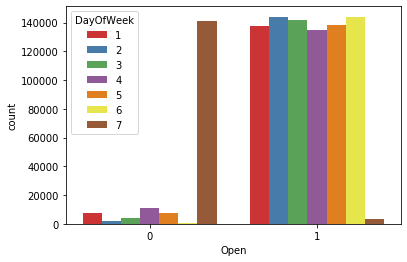

In [56]:
ax = sns.countplot(x='Open', hue='DayOfWeek', data=train_merge, palette='Set1')

In [0]:
import itertools

In [0]:
train_merge['SalesperCustomer']=train_merge['Sales']/train_merge['Customers']

In [59]:
train_merge['SalesperCustomer'].isnull().sum()

172869

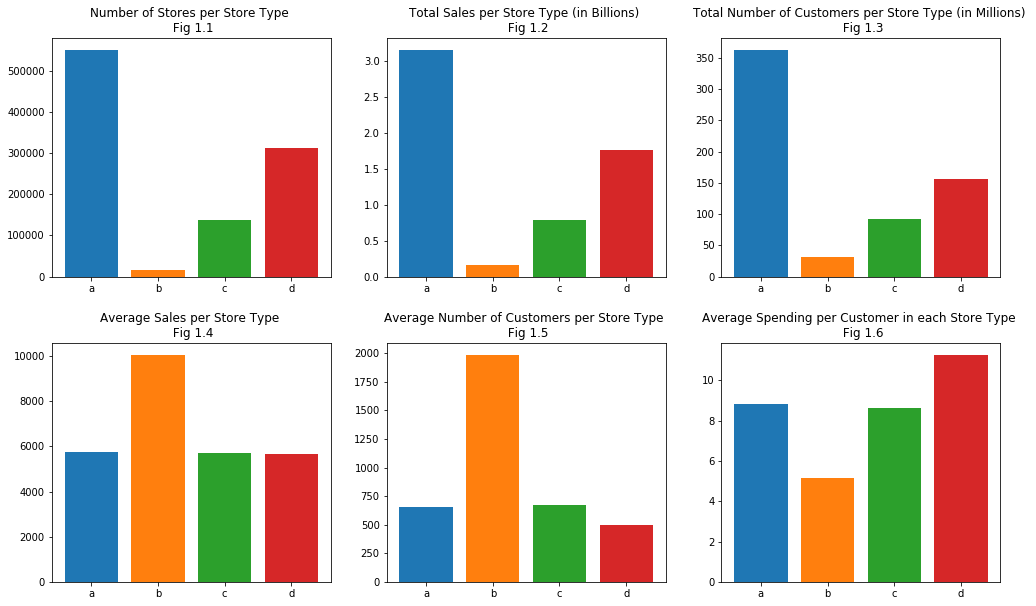

In [60]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(train_merge.groupby(by="StoreType").count().Store.index,train_merge.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(train_merge.groupby(by="StoreType").sum().Sales.index,train_merge.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(train_merge.groupby(by="StoreType").sum().Customers.index,train_merge.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(train_merge.groupby(by="StoreType").sum().Customers.index,train_merge.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(train_merge.groupby(by="StoreType").sum().Customers.index,train_merge.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(train_merge.groupby(by="StoreType").sum().Sales.index,train_merge.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

Plotting the quantity of Sales with respect to Date 

1
(942, 19)


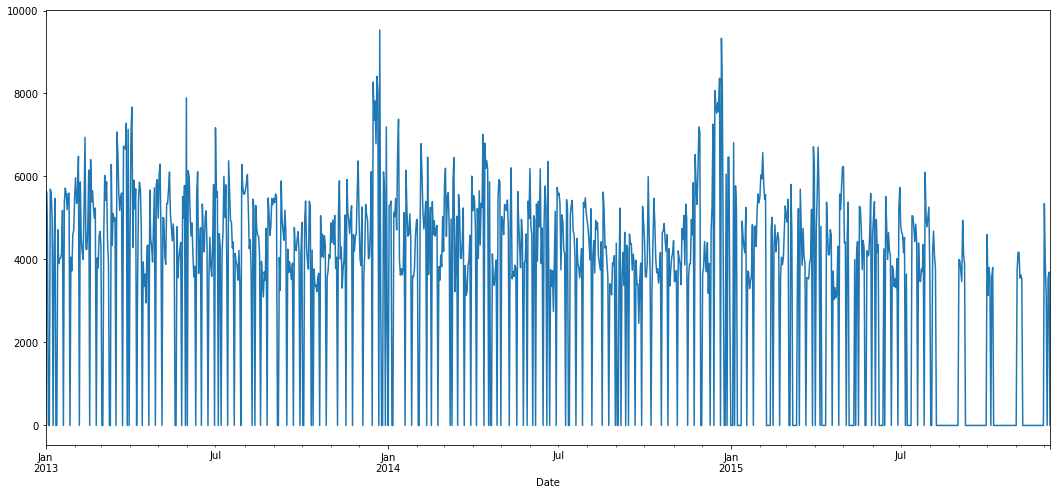

In [61]:
train_merge['Date'] = pd.to_datetime(train_merge['Date'],format = '%Y-%m-%d')
store_id = train_merge.Store.unique()[0]
print(store_id)
store_rows = train_merge[train_merge['Store'] == store_id]
print(store_rows.shape)
store_rows.resample('1D',on = 'Date')['Sales'].sum().plot.line(figsize = (18,8))

Plotting the average value of sales with respect to Day of Week

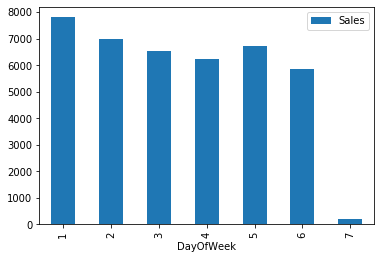

In [62]:
avg_per_weekday = train_merge[['Sales', 'DayOfWeek']].groupby('DayOfWeek').mean()
avg_per_weekday.reset_index().plot(kind='bar', x='DayOfWeek', y='Sales')

Plotting the average value of Sales & Customers with respect to Day of Week & Promo columns

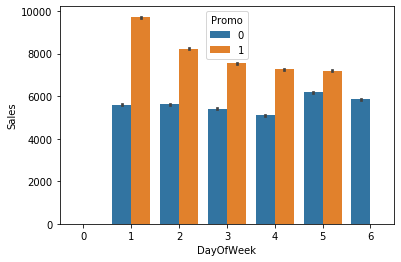

In [63]:
avg_hist_by_month = train_merge[['Sales', 'Customers', 'Promo']].groupby(['Promo']).mean()
sns.barplot(x="DayOfWeek", y="Sales", hue="Promo", order=[0, 1, 2, 3, 4, 5, 6], data=train_merge)

Plotting the average value of Sales & Customers with respect to Promo column

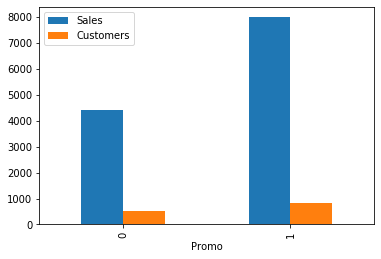

In [64]:
avg_promotion = train_merge[['Sales', 'Customers', 'Promo']].groupby('Promo').mean()
avg_promotion.plot(kind='bar')

Plotting the average value of Sales & Customers with respect to State Holiday column

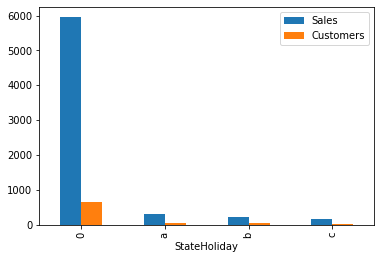

In [65]:
avg_stateholiday = train_merge[['Sales', 'Customers', 'StateHoliday']].groupby('StateHoliday').mean()
avg_stateholiday.plot(kind='bar')

In [66]:
train_merge.dtypes

Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Year                            int64
Month                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
Sales                           int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
Promo2                       category
Promo2SinceWeek              category
Promo2SinceYear              category
PromoInterval                category
SalesperCustomer              float64
dtype: object

Dropping the Unnecessary Columns

In [0]:
train_merge.drop(columns=['Date','Store','SalesperCustomer','Customers'],inplace=True)

In [0]:
test_merge.drop(columns=['Date','Store'],inplace=True)

Splitting the Data into Train & Validation data

In [0]:
y = train_merge["Sales"]
x = train_merge.drop(["Sales"], axis = 1)
y = np.log(train_merge["Sales"]+1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 456)

Changing the Data Types

In [0]:
columns = ['StateHoliday','SchoolHoliday','Open','Promo','DayOfWeek','Year','Month']
for col in columns:
    X_train[col]=X_train[col].astype('category')


In [0]:
columns = ['StateHoliday','SchoolHoliday','Open','Promo','DayOfWeek','Year','Month']
for col in columns:
    test_merge[col]=test_merge[col].astype('category')

In [72]:
num_attr=list(X_train.select_dtypes(['int64','float64']).columns)
num_attr

['CompetitionDistance']

In [73]:
cat_attr = list(X_train.select_dtypes('category').columns)
cat_attr

['DayOfWeek',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [0]:
cat_attr1 = list(X_train.select_dtypes('category').columns)
cat_attr1.remove('PromoInterval')

In [75]:
X_train[cat_attr].head(3)

,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
767644,3,2014,3,1,1,0,0,c,a,0,0.0,0.0,0
924540,1,2013,10,1,0,0,0,a,c,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
710752,5,2014,10,1,1,0,0,a,a,0,0.0,0.0,0


Imputing the missing values in Categorical columns

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(X_train[cat_attr1])

X_train[cat_attr1] = imputer.transform(X_train[cat_attr1])
X_test[cat_attr1] = imputer.transform(X_test[cat_attr1])
test_merge[cat_attr1] = imputer.transform(test_merge[cat_attr1])

In [77]:
test_merge.isnull().sum()

Id                     0
DayOfWeek              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Promo2SinceWeek        0
Promo2SinceYear        0
PromoInterval          0
dtype: int64

Standardizing the Numerical features

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaler.transform(X_train[num_attr])
scaler.transform(X_test[num_attr])
scaler.transform(test_merge[num_attr])

array([[-0.54018849],
       [-0.54018849],
       [-0.54018849],
       ...,
       [-0.01127013],
       [-0.01127013],
       [-0.01127013]])

### Categorical Embedding - Dummyfying the Categorical features

In [0]:
X_train = pd.get_dummies(columns=cat_attr,data=X_train,drop_first=True)
X_test = pd.get_dummies(columns=cat_attr,data=X_test,drop_first=True)
test_merge = pd.get_dummies(columns=cat_attr,data=test_merge,drop_first=True)

In [0]:
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
test_merge = test_merge.reindex(columns = X_train.columns, fill_value=0)

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Model Building with Cross Validation Strategy & Hyper Parameters Tuning

1. Applying Linear Regression model

In [0]:
lin_reg = LinearRegression()

In [84]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

Defining the evaluation metric i.e. RMSPE metric 

In [0]:
def RMSPE_metrics(y_true, y_pred):
    error = (y_true - y_pred)/y_pred
    return np.sqrt(np.mean(error**2)*100)

In [0]:
train_set_rmspe = RMSPE_metrics(y_train, train_pred)
test_set_rmspe = RMSPE_metrics(y_test, test_pred)

Checking the RMSPE values of Train & validation Data

In [88]:
print(train_set_rmspe)
print(test_set_rmspe)

4.140065927457879
4.13864225696411


Doing Predictions on the Test Data

In [0]:
TEST_pred_lin_reg = lin_reg.predict(test_merge)
TEST_pred_lin_reg_inv = np.exp(TEST_pred_lin_reg)-1

In [90]:
DF = pd.DataFrame(list(zip(Test_data['Id'],TEST_pred_lin_reg_inv)),columns=['Id','Sales'])
DF.to_csv("LinRegPredictions.csv",index=False)
DF.shape

(41088, 2)

2. Applying Random Forest Model with Cross Validation & Hyper Parameters Tuning 

In [0]:
RF_Reg = RandomForestRegressor()

In [0]:
RF_param_grid = {"n_estimators" : [10, 15],
               "max_depth" : [5,8],
               "max_features" : [3, 5],
               "min_samples_leaf" : [4, 6]}

rf_grid = GridSearchCV(RF_Reg, param_grid=RF_param_grid, cv=5)

In [93]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
train_pred_rfc = rf_grid.predict(X_train)
test_pred_rfc = rf_grid.predict(X_test)

In [0]:
train_set_rmspe_rfc = RMSPE_metrics(y_train, train_pred_rfc)
test_set_rmspe_rfc = RMSPE_metrics(y_test, test_pred_rfc)

Printing RMSPE values for Training & Validation Data

In [96]:
print(train_set_rmspe_rfc)
print(test_set_rmspe_rfc)

4.207488690113178
4.205833584026581


Doing Predictions on the Test Data

In [0]:
TEST_pred_rfc = rf_grid.predict(test_merge)
TEST_pred_rfc_inv = np.exp(TEST_pred_rfc)-1

In [98]:
DF = pd.DataFrame(list(zip(Test_data['Id'],TEST_pred_rfc_inv)),columns=['Id','Sales'])
DF.to_csv("RFCPredictions.csv",index=False)
DF.shape

(41088, 2)

3. Applying Decision Tree Model with Cross Validation & Hyper Parameters tuning

In [0]:
dt = DecisionTreeRegressor()

In [100]:
dt1 = DecisionTreeRegressor()
dt1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Checking the Features Importance

In [101]:
dt1.feature_importances_

array([4.94344622e-03, 1.62278318e-04, 1.43210730e-04, 1.26048864e-04,
       1.61686628e-04, 2.42097038e-04, 9.68125961e-05, 2.49310375e-04,
       1.78351392e-04, 6.54509964e-05, 6.05758510e-05, 5.95213966e-05,
       5.92935626e-05, 4.82117495e-05, 6.06817930e-05, 5.38460523e-05,
       5.29162804e-05, 5.45496525e-05, 4.59212296e-05, 1.62440469e-04,
       9.87130265e-01, 2.25368185e-03, 1.42469114e-05, 6.10703748e-06,
       1.27252586e-06, 1.88543000e-04, 2.59037887e-04, 3.22041239e-04,
       3.34153802e-04, 1.21166355e-05, 2.66951127e-04, 1.71669937e-04,
       9.05192642e-05, 2.92746315e-05, 1.06543851e-07, 2.40783923e-05,
       8.59131561e-05, 6.17641989e-05, 1.19670640e-04, 3.54852905e-05,
       1.75872703e-05, 4.94253669e-06, 3.15006697e-07, 3.32622504e-05,
       1.42202710e-06, 6.81078828e-05, 2.13604899e-05, 3.16381870e-06,
       3.64596890e-05, 9.23201033e-06, 1.37997605e-04, 7.92534841e-07,
       3.65516757e-05, 2.77399377e-05, 5.84742979e-08, 1.14127907e-06,
      

In [102]:
features = X_train.columns
importances = dt1.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,Open_1,CompetitionDistance,Promo_1,StoreType_d,StoreType_c,Promo2SinceYear_2013.0,Assortment_c,StoreType_b,Year_2014,DayOfWeek_6,SchoolHoliday_1,"PromoInterval_Mar,Jun,Sept,Dec",Year_2015,Promo2_1,Month_12,DayOfWeek_2,DayOfWeek_5,Promo2SinceYear_2014.0,"PromoInterval_Jan,Apr,Jul,Oct",DayOfWeek_3,Promo2SinceWeek_40.0,DayOfWeek_4,Promo2SinceYear_2012.0,Promo2SinceWeek_14.0,DayOfWeek_7,Promo2SinceWeek_1.0,Promo2SinceYear_2011.0,Promo2SinceWeek_10.0,Promo2SinceYear_2009.0,Promo2SinceWeek_31.0,Month_2,Promo2SinceWeek_13.0,Month_7,Month_3,Month_4,Month_5,"PromoInterval_Feb,May,Aug,Nov",Month_10,Month_8,Month_9,Month_6,Month_11,Promo2SinceYear_2010.0,Promo2SinceWeek_45.0,Promo2SinceWeek_37.0,Promo2SinceWeek_18.0,Promo2SinceWeek_27.0,Promo2SinceWeek_5.0,Promo2SinceWeek_48.0,Promo2SinceWeek_9.0,Promo2SinceWeek_35.0,Promo2SinceWeek_22.0,StateHoliday_a,Assortment_b,Promo2SinceWeek_39.0,Promo2SinceYear_2015.0,StateHoliday_b,Promo2SinceWeek_23.0,Promo2SinceWeek_36.0,Promo2SinceWeek_28.0,StateHoliday_c,Promo2SinceWeek_50.0,Promo2SinceWeek_44.0,Promo2SinceWeek_26.0,Promo2SinceWeek_6.0,Promo2SinceWeek_49.0
1,0.98713,0.00494345,0.00225368,0.000334154,0.000322041,0.000303104,0.000266951,0.000259038,0.00024931,0.000242097,0.000188543,0.000180867,0.000178351,0.00017167,0.00016244,0.000162278,0.000161687,0.000144531,0.000144314,0.000143211,0.000137998,0.000126049,0.00012181,0.000119671,9.68126e-05,9.05193e-05,8.59921e-05,8.59132e-05,7.48779e-05,6.81079e-05,6.5451e-05,6.17642e-05,6.06818e-05,6.05759e-05,5.95214e-05,5.92936e-05,5.6498e-05,5.45497e-05,5.38461e-05,5.29163e-05,4.82117e-05,4.59212e-05,4.55441e-05,3.65517e-05,3.64597e-05,3.54853e-05,3.32623e-05,2.92746e-05,2.77399e-05,2.40784e-05,2.13605e-05,1.75873e-05,1.42469e-05,1.21166e-05,9.23201e-06,8.77593e-06,6.10704e-06,4.94254e-06,3.16382e-06,1.42203e-06,1.27253e-06,1.14128e-06,7.92535e-07,3.15007e-07,1.06544e-07,5.84743e-08


In [0]:
dt_param_grid = {"criterion": ['mse'],
              "min_samples_split": [10, 20],
              "max_depth": [None, 5, 10,20],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10, 20],
              }

In [0]:
dt_grid = GridSearchCV(dt, param_grid=dt_param_grid, cv=5)

In [105]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse'], 'max_depth': [None, 5, 10, 20],
                         'max_leaf_nodes': [10, 20],
                       

In [0]:
train_pred_dt = dt_grid.predict(X_train)
test_pred_dt = dt_grid.predict(X_test)

In [0]:
train_set_rmspe_dt = RMSPE_metrics(y_train, train_pred_dt)
test_set_rmspe_dt = RMSPE_metrics(y_test, test_pred_dt)

Printing RMSPE values for Train & Validation data 

In [108]:
print(train_set_rmspe_dt)
print(test_set_rmspe_dt)

0.42717065878581423
0.42723656183237013


Doing Predictions on the Test Data

In [0]:
TEST_pred_dt = dt_grid.predict(test_merge)
TEST_pred_dt_inv = np.exp(TEST_pred_dt)-1

In [110]:
DF = pd.DataFrame(list(zip(Test_data['Id'],TEST_pred_dt_inv)),columns=['Id','Sales'])
DF.to_csv("DTPredictions.csv",index=False)
DF.shape

(41088, 2)